### Toppa @ Berkeley 2019 Data Team Homework 2
The dataset used for this homework is selected from FiveThirtyEight's Russian troll tweets dataset.  
Your task is to fill out all the places marked with #TODO.  


Author: Vincent  
Your name:  

In [1]:
import numpy as np
import pandas as pd
import nltk
import sklearn
from matplotlib import pyplot as plt
import re

data = pd.read_csv('data.csv')
data = data.drop(columns=['Unnamed: 0'])

In [2]:
data.head()

,tweetid,user_screen_name,user_reported_location,user_profile_description,follower_count,following_count,follower-to-following_ratio,account_creation_date,year_of_account_creation,month_of_account_creation,tweet_time,tweet_year,tweet_month,tweet_day,content,links,upper,average_num_of_words,bot_or_not
0,638180408731893761,NewOrleansON,"New Orleans, LA","Breaking news, weather, traffic and more for N...",35988,11010,3.268665,2014-05-05 00:00:00,2014,5,2015-08-31 02:44:00,2015,8,31,New Orleans Saints' Sean Payton says penalty o...,0,0,4.500000,1
1,892656081238990849,TodayNYCity,"New York, NY",New York City's local news on Twitter. Breakin...,66980,10500,6.379048,2014-08-27 00:00:00,2014,8,2017-08-02 07:59:00,2017,8,2,Suicide suspected in death of Brooklyn singer ...,2,0,8.083333,1
2,722669578220908546,Seattle_Post,"Seattle, WA",Be the first to know Seattle's local news. Pol...,25263,10975,2.301868,2014-06-15 00:00:00,2014,6,2016-04-20 06:13:00,2016,4,20,Comedian Tracy Morgan scraps planned Mississip...,1,0,10.111111,1
3,613089385014128640,Seattle_Post,"Seattle, WA",Be the first to know Seattle's local news. Pol...,25263,10975,2.301868,2014-06-15 00:00:00,2014,6,2015-06-22 21:01:00,2015,6,22,Maryland governor says he has cancer of lymph ...,0,0,4.900000,1
4,619873759940489216,AndyHashtagger,I AM A CITIZEN OF THE UNIVERSE,#Hashtag warrior | I follow back | Bacon is my...,22026,12966,1.698751,2014-10-26 00:00:00,2014,10,2015-07-11 14:19:00,2015,7,11,@grosby81 Nice! http://t.co/7i7QK1vUJM,0,0,12.000000,1


### Exercise 1: Character Count
Step 1: Select the 'content' column from the dataset as a pandas series  
Step 2: Use Python's .apply() function to compute the length of each 'content' and store them in a new pandas column called 'char_count'  
Step 3: Print the average character count of the 'char_count' column.  

In [ ]:
# Create a feature char_count
data['char_count'] = data['content'].apply(#TODO)

# Print the average character count
#TODO

### Exercise 2: Intro to one-hot encoding
Step 1: Choose a string from data's 'content' column as you like.  
Step 2: Using .split() function, split the string whereever there is a space. You should get a list.   
Step 3: Using pandas's .get_dummies() function, do one-hot encoding over the list you have.  

In [ ]:
x = #TODO

In [ ]:
y = pd.get_dummies(#TODO)
y

### Exercise 3: Counting and plotting special characters
Step 1: Read and understand the count_hashtags function below.  
Step 2: Follow the steps in the provided function, create your own function called 'count_mentions'.  
Step 3: Implement your function. It should count the number of '@' characters and plot the according graph.  

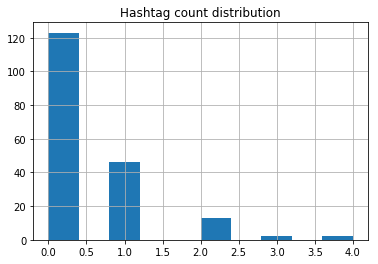

In [3]:
# Function that returns numner of hashtags in a string
def count_hashtags(string):
    # Split the string into words
    words = string.split()

    # Create a list of words that are hashtags
    hashtags = [word for word in words if word.startswith('#')]

    # Return number of hashtags
    return(len(hashtags))

# Create a feature hashtag_count and display distribution
data['hashtag_count'] = data['content'].apply(count_hashtags)
data['hashtag_count'].hist()
plt.title('Hashtag count distribution')
plt.show()

In [ ]:
def count_mentions(string):
    # Your Code Here:




### (Optional) Exercise 4: Regex Practice
Step 1: Select the 5th entry of data['content']  
Step 2: Write a regex pattern that matches '.!?'  
Step 3: Split the string with your pattern  

In [ ]:
x = #TODO
pattern = #TODO
print(re.split(pattern, x))

### Exercise 5: Intro to tokenization
Step 1: select any entry of the 'content' column you prefer.  
Step 2: use the imported word_tokenize() function, tokenize the string.  
Step 3: print unique tokens result.  

In [ ]:
from nltk.tokenize import word_tokenize

#Your Code Here

### Exercise 6: Vectorizers
Step 1: Use sklearn's train_test_split function, create your own train and test set with the following parameters:
 - X: your data, basically the 'content' column of the data
 - y: your labels, the bot_or_not column
 - test_size: 0.33
 - random_state: 53  
 
 
Step 2: Initialize a CountVectorizer object, parameter: stop_words='english'.  
Step 3: fit and transform X_train.values using your vectorizer, this will be your training data.  
Step 4: transform X_test.values as well.  
Step 5: print some features.  
(Optional) Step 6: Do the same thing, this time with TfidfVectorizer

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = #TODO

In [ ]:
# Initialize a CountVectorizer object

# Transform the training data using only the 'text' column values

# Transform the test data using only the 'text' column values

# Print the first 10 features of the count_vectorizer
print(count_vectorizer.get_feature_names()[:10])

In [ ]:
# Step 6
from sklearn.feature_extraction.text import TfidfVectorizer 
#TODO

### Exercise 7: Naive Text Classification with Naive Bayes
Step 1: Fill in count_train using the vectorized X_train data you got from 6.  
Step 2: Complete the code block, print the values you get.  
(Optional) Step 3: Do the same thing, this time using the TFIDF data from 6.

In [ ]:
from sklearn import metrics
from sklearn.naive_bayes import MultinomialNB

nb_classifier = MultinomialNB()

count_train = #TODO: Your vectorized X_train
count_test = #TODO: Your vectorized X_test

nb_classifier.fit(count_train, y_train)

pred = nb_classifier.predict(count_test)

score = metrics.accuracy_score(y_test, pred)
print(score)

cm = metrics.confusion_matrix(y_test, pred, labels=[0,1])
print(cm)

### Congrats! Now you've sucessfully trained a classifier to identify Russian troll tweets with a decent accuracy!